In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## __1 - Business Problem__  
___Whether the client has subscribed a term deposit or not Binomial ("yes" or "no")___  

## __2 - Data collection and description__ 

In [4]:
df = pd.read_csv("bank-full.csv.crdownload",sep = ';')

<IPython.core.display.Javascript object>

In [5]:
df1 = df.copy()

In [6]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33089,32,admin.,married,secondary,no,20011.0,no,no,cellular,20.0,apr,234.0,1.0,-1.0,0.0,unknown,no
33090,28,blue-collar,married,secondary,no,1021.0,yes,no,cellular,20.0,apr,774.0,2.0,326.0,1.0,other,no
33091,30,management,single,secondary,no,161.0,yes,no,cellular,20.0,apr,397.0,3.0,-1.0,0.0,unknown,no
33092,43,services,married,secondary,no,1625.0,yes,no,cellular,20.0,apr,390.0,1.0,-1.0,0.0,unknown,no


In [10]:
df1.describe

<bound method NDFrame.describe of        age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no   2143.0     yes   no   
1       44    technician   single  secondary      no     29.0     yes   no   
2       33  entrepreneur  married  secondary      no      2.0     yes  yes   
3       47   blue-collar  married    unknown      no   1506.0     yes   no   
4       33       unknown   single    unknown      no      1.0      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
33089   32        admin.  married  secondary      no  20011.0      no   no   
33090   28   blue-collar  married  secondary      no   1021.0     yes   no   
33091   30    management   single  secondary      no    161.0     yes   no   
33092   43      services  married  secondary      no   1625.0     yes   no   
33093    4           NaN      NaN        NaN     NaN      NaN     NaN  NaN   

        contact   day month  

<IPython.core.display.Javascript object>

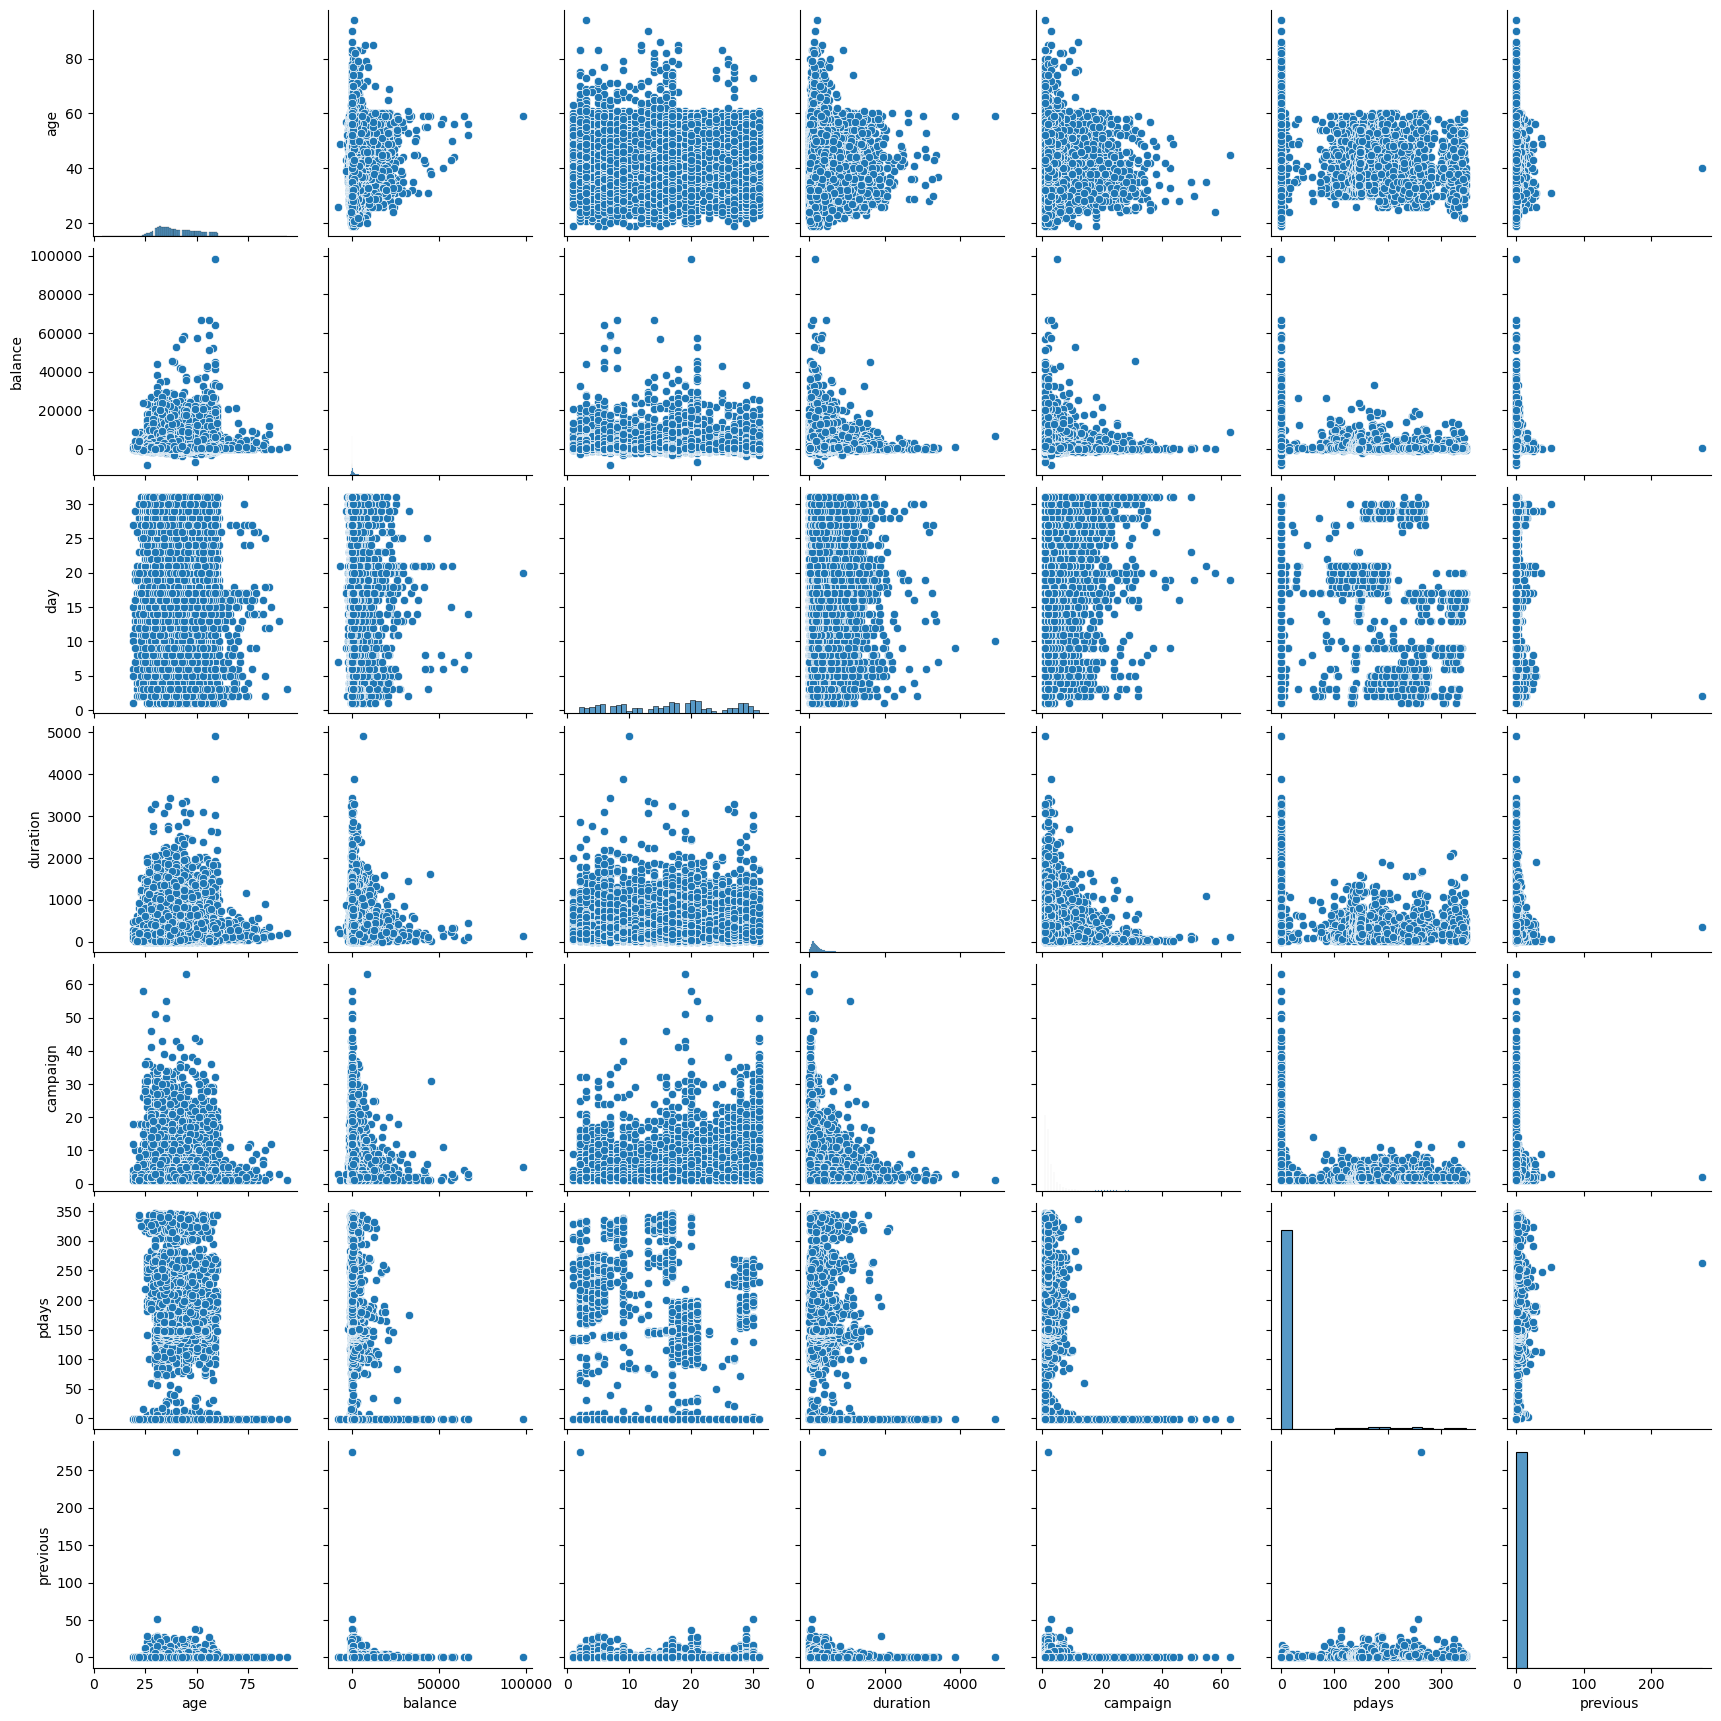

In [6]:
sns.pairplot(df1)

In [20]:
df1['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [21]:
count_no_sub = len(df1[df1['y']=="no"])
count_sub = len(df1[df1['y']=="yes"])

In [22]:
(count_sub / (count_sub + count_no_sub))*100

11.698480458295547

### Percentage of Client Subscribed is 11.70 % in the current data set

Text(0, 0.5, 'Frequency of subscribtion')

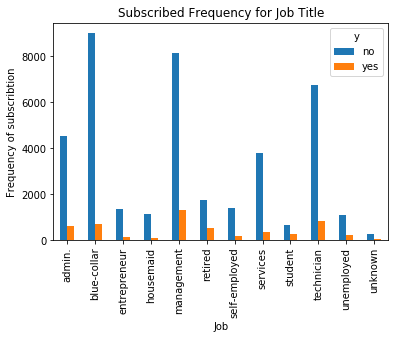

In [13]:
pd.crosstab(df1.job,df1.y).plot(kind='bar')
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')

The frequency of subscribtion depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0, 0.5, 'Proportion of Customers')

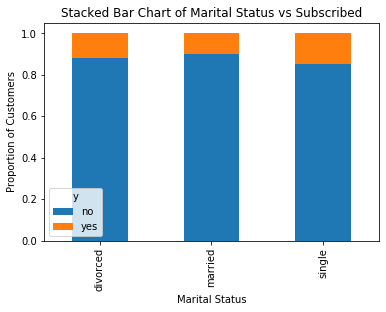

In [14]:
table=pd.crosstab(df1.marital,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

### The marital status seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

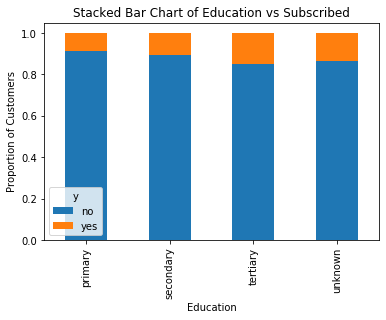

In [15]:
table=pd.crosstab(df1.education,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

### Education seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

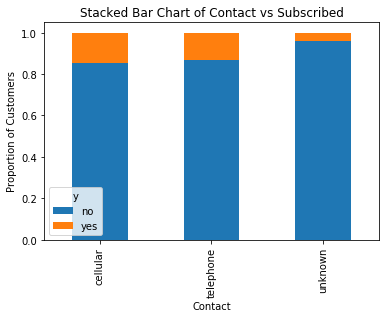

In [18]:
table=pd.crosstab(df1.contact,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Contact vs Subscribed')
plt.xlabel('Contact')
plt.ylabel('Proportion of Customers')

### Contact does not seem a strong predictor for the outcome variable

Text(0, 0.5, 'Proportion of Customers')

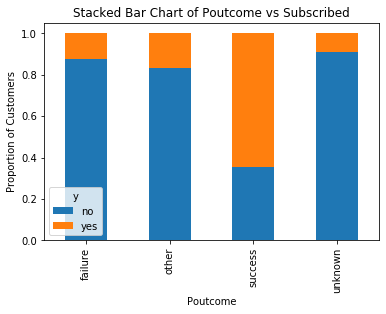

In [19]:
table=pd.crosstab(df1.poutcome,df1.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Poutcome vs Subscribed')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')

### Poutcome does not seem a strong predictor for the outcome variable

Text(0, 0.5, 'Frequency')

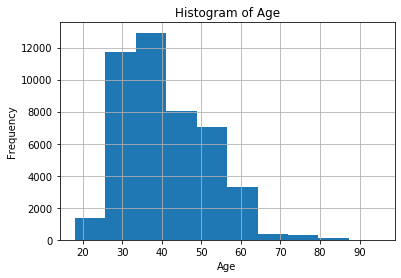

In [25]:
df1.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

### Most of the customers are in age between 20 and 50 years

Text(0, 0.5, 'Frequency of Subscribed')

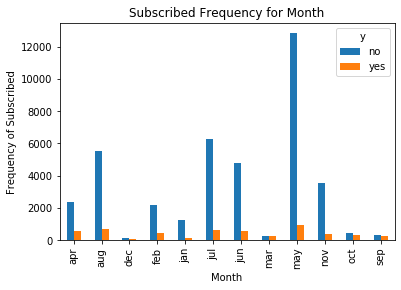

In [29]:
pd.crosstab(df1.month,df1.y).plot(kind='bar')
plt.title('Subscribed Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subscribed')

### Month might be a good predictor of the outcome variabl

Text(0, 0.5, 'Frequency')

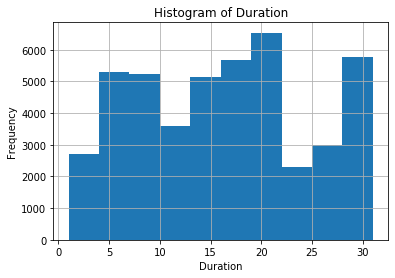

In [28]:
df1.day.hist()
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

In [30]:
df1['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

### Data is somewhat evenly distributed on whether the client has House or not

In [31]:
df1['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

### However majority of the client do not have loan

## __3 - Cleaning Data__ 

In [32]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Since there are no Null values in any column we don't have to create any exceptions

## __4 - Logistic Regression Model__ 

In [33]:
df1 ['default'] = df1 ['default'].map({'yes': 1, 'no': 0})

In [34]:
df1 ['housing'] = df1 ['housing'].map({'yes': 1, 'no': 0})

In [35]:
df1 ['loan'] = df1 ['loan'].map({'yes': 1, 'no': 0})

In [49]:
df1 ['y'] = df1 ['y'].map({'yes': 1, 'no': 0})

In [36]:
df1 = pd.get_dummies(df1, columns=['job'])

In [37]:
df1 = pd.get_dummies(df1, columns=['marital'])

In [38]:
df1 = pd.get_dummies(df1, columns=['education'])

In [40]:
df1 = pd.get_dummies(df1, columns=['month'])

In [44]:
df1 = df1.drop(['contact', 'poutcome'], axis=1)

In [50]:
X = df1.loc[:, df1.columns != 'y']
y = df1.loc[:, df1.columns == 'y']

In [52]:
logreg = LogisticRegression()

In [53]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

[False  True False  True  True False False False False False False False
 False  True False  True False False  True False False False False  True
 False  True False False  True False  True  True  True  True  True  True
  True  True  True  True  True]
[21  1 22  1  1 19 18  9 20 10 17  7  4  1 14  1 12 11  1 13  5  3  8  1
 16  1  2 15  1  6  1  1  1  1  1  1  1  1  1  1  1]


C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### As per Recursive Feature Elimination (RFE) analysis we can exclude all the variables which are False

In [57]:
X = df1[['default', 'housing', 'loan', 'job_housemaid', 'job_retired', 'job_student', 'marital_married', 'education_primary', 'education_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = df1.loc[:, df1.columns == 'y']

In [58]:
logit=sm.Logit(y,X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.329035
         Iterations 7


In [59]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45191
Method:                           MLE   Df Model:                           19
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                 0.08823
Time:                        17:56:36   Log-Likelihood:                -14876.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default              -0.3787      0.147     -2.583      0.010      -0.666      -0.091
housing              -0.8781      0.032    -27.113      0.000      -0.942      -0.815
loan                 -0.5724      0.052    -11.078      0.000      -0.674      -0.471
job_housemaid        -0.3289      0.107     -3.063      0.002      -0.539      -0.118
job_retired           0.4625      0.060      7.766      0.000       0.346       0.579
job_student           0.3142      0.083      3.793      0.000       0.152       0.477
marital_married      -0.4290      0.030    -14.327      0.000      -0.488      -0.370
education_primary    -0.4093      0.050     -8.128      0.000      -0.508      -0.311
education_unknown    -0.1917      0.076     -2.526      0.012      -0.340      -0.043
month_aug            -1.6473      0.044    -37.054      0.000      -1.734      -1.560
month_dec             0.2455      0.143      1.721      0.085      -0.034       0.525
month_feb            -1.0118      0.056    -18.069      0.000      -1.122      -0.902
month_jan            -1.6548      0.091    -18.198      0.000      -1.833      -1.477
month_jul            -1.4992      0.048    -31.550      0.000      -1.592      -1.406
month_jun            -1.4979      0.050    -30.193      0.000      -1.595      -1.401
month_mar             0.5074      0.097      5.253      0.000       0.318       0.697
month_may            -1.5674      0.044    -35.900      0.000      -1.653      -1.482
month_nov            -1.4004      0.057    -24.622      0.000      -1.512      -1.289
month_oct             0.1817      0.079      2.290      0.022       0.026       0.337
month_sep             0.2701      0.088      3.053      0.002       0.097       0.443
=====================================================================================
"""

#### All variables have significant p value

In [60]:
logreg.fit(X, y)

C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SohailShaikh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.88


In [62]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     39922
           1       0.49      0.09      0.15      5289

    accuracy                           0.88     45211
   macro avg       0.69      0.54      0.54     45211
weighted avg       0.84      0.88      0.84     45211



In [63]:
confusion_matrix(y, y_pred)

array([[39455,   467],
       [ 4833,   456]], dtype=int64)

## __5 - Output Interpretation__ 

1 - Confusion Matrix  
The result is telling us that we have 39455+456 correct predictions and 4833+467 incorrect predictions.

2 - Accuracy == 84%   
Of the entire data set, 84% of the clients will subcribe